# Ali Ahmed Hassan 1808627
# Amr Fawzy Fathy 1803149

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.metrics import classification_report,confusion_matrix 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# STEP 1: LOADING THE DATASET AND VISUALISING IT

In [2]:
data_set = pd.read_csv("data.csv")
data_set_size = len(data_set)
print(data_set_size )

863


In [35]:
print(data_set)
ds=data_set.sample(frac=1,random_state=1)
print("***********************************************************")
print(ds)


     Unnamed: 0  location  country  gender   age  vis_wuhan  from_wuhan  \
0             0       104        8       1  66.0          1           0   
1             1       101        8       0  56.0          0           1   
2             2       137        8       1  46.0          0           1   
3             3       116        8       0  60.0          1           0   
4             4       116        8       1  58.0          0           0   
..          ...       ...      ...     ...   ...        ...         ...   
858         858        48        3       2  24.0          0           0   
859         859         0        0       2  35.0          0           0   
860         860         3        1       1  49.4          0           0   
861         861        24        9       1  49.4          0           0   
862         862        15       27       1  70.0          0           0   

     symptom1  symptom2  symptom3  symptom4  symptom5  symptom6  diff_sym_hos  \
0          14     

# 2-Split The Dataset Into X and Y

In [4]:
x=ds[['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
y=ds['result']


# 3-split the data to 20% validation-70% training-10% test

In [5]:
xVal=x[:172]
yVal=y[:172]
X=x[172:]
Y=y[172:]

In [6]:
xTrain,xTest,yTrain,yTest=train_test_split(X,Y,test_size=0.13)

In [7]:
print ((len(xTrain)/len(ds)*100))
print ((len(xTest)/len(ds)*100))
print ((len(xVal)/len(ds)*100))

69.64078794901506
10.428736964078796
19.930475086906142


In [8]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
scaler.fit(xTrain)
xTrain=scaler.transform(xTrain)
xTest=scaler.transform(xTest)
xVal=scaler.transform(xVal)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(3,10,2):
    classifier=KNeighborsClassifier(n_neighbors=i)
    classifier.fit(xTrain,yTrain)
    yPred=classifier.predict(xVal)
    print ("reslults for k=",i)
    print (classification_report(yVal,yPred))
    print (confusion_matrix (yVal,yPred))
    


reslults for k= 3
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       152
           1       0.83      0.50      0.62        20

    accuracy                           0.93       172
   macro avg       0.89      0.74      0.79       172
weighted avg       0.93      0.93      0.92       172

[[150   2]
 [ 10  10]]
reslults for k= 5
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       152
           1       0.86      0.60      0.71        20

    accuracy                           0.94       172
   macro avg       0.90      0.79      0.84       172
weighted avg       0.94      0.94      0.94       172

[[150   2]
 [  8  12]]
reslults for k= 7
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       152
           1       0.92      0.60      0.73        20

    accuracy                           0.95       172
   macro avg       0.94     

In [10]:
#we can see that recall in k=5 is better than recall in k=3,7,9 and the recall is what we care about most in our decision
#so we take k=5


### now we apply the knn classifier with k=5 on the test set and see the results


In [11]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xTrain,yTrain)
y_Pred=classifier.predict(xTest)
print (classification_report(yTest,y_Pred))
print (confusion_matrix (yTest,y_Pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        78
           1       1.00      0.58      0.74        12

    accuracy                           0.94        90
   macro avg       0.97      0.79      0.85        90
weighted avg       0.95      0.94      0.94        90

[[78  0]
 [ 5  7]]


# classifier 2 : Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

## split the data to 70% training-30% test

In [8]:
x_Train,x_Test,y_Train,y_Test=train_test_split(x,y,test_size=0.3)
#print ((len(x_Train)/len(x))*100,'%')


In [14]:
log_reg = LogisticRegression(max_iter=7000)
log_reg.fit(x_Train, y_Train)

LogisticRegression(max_iter=7000)

In [15]:
yPred = log_reg.predict(x_Test)

In [16]:
    print (classification_report(y_Test,yPred))
    print (confusion_matrix (y_Test,yPred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       228
           1       0.81      0.68      0.74        31

    accuracy                           0.94       259
   macro avg       0.88      0.83      0.85       259
weighted avg       0.94      0.94      0.94       259

[[223   5]
 [ 10  21]]


# classifier 3 : Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_Train,y_Train)


GaussianNB()

In [18]:
ypredict=model.predict(x_Test)

In [27]:
y_pres=model.predict_proba(x_Test)

In [20]:
    print (classification_report(y_Test,ypredict))
    print (confusion_matrix (y_Test,ypredict))

              precision    recall  f1-score   support

           0       0.98      0.69      0.81       228
           1       0.28      0.90      0.43        31

    accuracy                           0.71       259
   macro avg       0.63      0.80      0.62       259
weighted avg       0.90      0.71      0.76       259

[[157  71]
 [  3  28]]


# plotting roc curves

In [21]:
#for KNN

fpr, tpr, threshold = roc_curve(yTest,y_Pred)
roc_auc_KNN = auc(fpr, tpr)
print(roc_auc_KNN)

0.7916666666666667


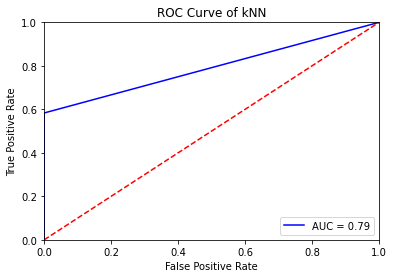

In [22]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_KNN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [29]:
#ROC curve for Logistic Regression
fpr, tpr, threshold = roc_curve(y_Test,yPred)
roc_auc_logestic = auc(fpr, tpr)
print(roc_auc_logestic)

0.827744765138653


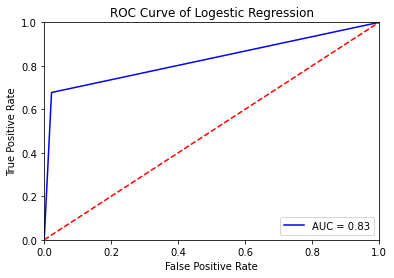

In [30]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_logestic)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Logestic Regression')
plt.show()

In [25]:
#ROC curve for naive bayes
fpr, tpr, threshold = roc_curve(y_Test,ypredict)
roc_auc_naive = auc(fpr, tpr)
print(roc_auc_naive)

0.7959111488398416


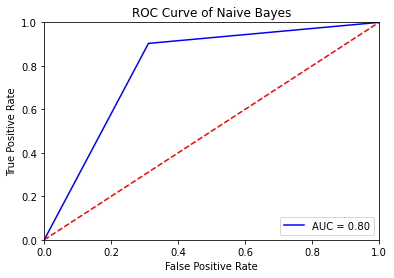

In [26]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_naive)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes')
plt.show()

# From comparing AUC and F1 scores and confusion matrices in 3 classifiers the Logestic resgression is the best

# phase 2

## classifier 4 : Decision Tree

we will train 2 models first one with criterion="entropy"and second with criterion="gini-index" and test the two models on validation set and the better results its model will be tested on the test set

In [60]:
#model 1 with criterion="entropy" 
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion="entropy",random_state=5)
model.fit(xTrain,yTrain)

DecisionTreeClassifier(criterion='entropy', random_state=5)

In [61]:
YPREDICT=model.predict(xVal)

In [62]:
from sklearn.metrics import accuracy_score
print("the predicted accuracy is ", accuracy_score(yVal,YPREDICT))

the predicted accuracy is  0.9651162790697675


In [63]:
print (confusion_matrix (yVal,YPREDICT))

[[152   0]
 [  6  14]]


In [64]:
print (classification_report(yVal,YPREDICT))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       152
           1       1.00      0.70      0.82        20

    accuracy                           0.97       172
   macro avg       0.98      0.85      0.90       172
weighted avg       0.97      0.97      0.96       172



In [65]:
#model 2 with criterion="gini"
model_gini=DecisionTreeClassifier(criterion="gini",random_state=1000)
model_gini.fit(xTrain,yTrain)

DecisionTreeClassifier(random_state=1000)

In [66]:
Y_PREDICT=model_gini.predict(xVal)

In [67]:
print("the predicted accuracy is ", accuracy_score(yVal,Y_PREDICT))

the predicted accuracy is  0.9709302325581395


In [68]:
print (confusion_matrix (yVal,Y_PREDICT))

[[150   2]
 [  3  17]]


In [69]:
print (classification_report(yVal,Y_PREDICT))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       152
           1       0.89      0.85      0.87        20

    accuracy                           0.97       172
   macro avg       0.94      0.92      0.93       172
weighted avg       0.97      0.97      0.97       172



In [75]:
# the accuracy is better in ginimodel
y_predict=model_gini.predict(xTest)


In [76]:
#visualizing decision tree
import sklearn
#sklearn.tree.plot_tree(model)

In [77]:
print("the predicted accuracy is ", accuracy_score(yTest,y_predict))
print (confusion_matrix (yTest,y_predict))
print (classification_report(yTest,y_predict))


the predicted accuracy is  0.9555555555555556
[[74  3]
 [ 1 12]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        77
           1       0.80      0.92      0.86        13

    accuracy                           0.96        90
   macro avg       0.89      0.94      0.92        90
weighted avg       0.96      0.96      0.96        90



In [78]:
# roc curve and auc score for decision tree :
fpr, tpr, threshold = roc_curve(yTest,y_predict)
roc_auc_tree = auc(fpr, tpr)
print(roc_auc_tree)

0.942057942057942


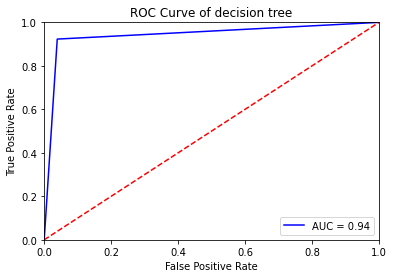

In [79]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_tree)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of decision tree')
plt.show()

## classifier 5 : SVM

first we will see the optimal value for the hyperparameter C to balance the tradeoff between margin and violation :

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [49]:
for i in range(1,70,5):
    svc_model=LinearSVC(C=i,loss="hinge",random_state=30)
    svc_model.fit(xTrain,yTrain)
    YPRED=svc_model.predict(xVal)
    print ("reslults for C=",i)
    print (classification_report(yVal,YPRED))
    print (confusion_matrix (yVal,YPRED))
    fpr, tpr, threshold = roc_curve(yVal,YPRED)
    roc_auc_svc = auc(fpr, tpr)
    print("AUC score is ",roc_auc_svc)
    print ("***************************************************************")

C:\Users\Ali Ahmed\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Ali Ahmed\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Ali Ahmed\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Ali Ahmed\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Ali Ahmed\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the 

reslults for C= 1
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       152
           1       0.85      0.55      0.67        20

    accuracy                           0.94       172
   macro avg       0.89      0.77      0.82       172
weighted avg       0.93      0.94      0.93       172

[[150   2]
 [  9  11]]
AUC score is  0.7684210526315789
***************************************************************
reslults for C= 6
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       152
           1       0.91      0.50      0.65        20

    accuracy                           0.94       172
   macro avg       0.92      0.75      0.81       172
weighted avg       0.93      0.94      0.93       172

[[151   1]
 [ 10  10]]
AUC score is  0.7467105263157896
***************************************************************
reslults for C= 11
              precision    recall  f1-score   suppo

C:\Users\Ali Ahmed\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Ali Ahmed\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Ali Ahmed\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Ali Ahmed\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Ali Ahmed\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the 

In [53]:
#the best results is at C=56 with AUC=0.84 so now we test the final model on test set 
svc_final_model=LinearSVC(C=56,loss="hinge",random_state=30)
svc_final_model.fit(xTrain,yTrain)
ypredict=svc_final_model.predict(xTest)
print (classification_report(yTest,ypredict))
print (confusion_matrix (yTest,ypredict))
fpr, tpr, threshold = roc_curve(yTest,ypredict)
roc_auc_SVC = auc(fpr, tpr)
print("AUC score is ",roc_auc_SVC)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        77
           1       0.83      0.77      0.80        13

    accuracy                           0.94        90
   macro avg       0.90      0.87      0.88        90
weighted avg       0.94      0.94      0.94        90

[[75  2]
 [ 3 10]]
AUC score is  0.8716283716283716


C:\Users\Ali Ahmed\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


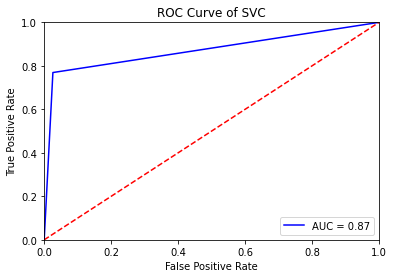

In [54]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_SVC)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of SVC')
plt.show()

# Project results :
KNN AUC=0.79 , Logestic AUC=0.83, Naive Bayes AUC=0.8, Decision tree AUC=0.94, SVC AUC=0.87 
So the decision tree is the best classifier in this problem with just 3 false positive samples and one false negative samples
note that results can change with every run because the random shuffle in data but not big change

In [80]:
#we can see the results of decision tree again :
print("the predicted accuracy is ", accuracy_score(yTest,y_predict))
print (confusion_matrix (yTest,y_predict))
print (classification_report(yTest,y_predict))
fpr, tpr, threshold = roc_curve(yTest,y_predict)
roc_auc_tree = auc(fpr, tpr)
print(roc_auc_tree)

the predicted accuracy is  0.9555555555555556
[[74  3]
 [ 1 12]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        77
           1       0.80      0.92      0.86        13

    accuracy                           0.96        90
   macro avg       0.89      0.94      0.92        90
weighted avg       0.96      0.96      0.96        90

0.942057942057942


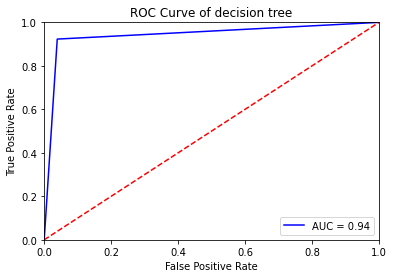

In [81]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_tree)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of decision tree')
plt.show()